Total of four different models needed:
- Time-series models to forecast distribution of natural disasters in the future
- Geospatial regression model to predict the location of the disaster
- Another classification model to classify the severity of the disaster

Models that we could try:
- Time-series: 
    - ARIMA
    - LSTMs
- Disaster location prediction model
    - Geographically Weighted Regression
    - Gaussian Process Regression
- Disaster severity classifier
    - Random forest
    - Gradient boosting
    - Deep neural networks

Datasets used:
- https://www.earthdata.nasa.gov/data/catalog/sedac-ciesin-sedac-pend-gdis-1.00
- https://www.emdat.be/
- These two datasets can be joined and used together

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
geocoded_df = pd.read_csv("data/geocoded.csv")
geocoded_df["DisNo."] = geocoded_df["disasterno"].astype(str) + "-" + geocoded_df["iso3"].astype(str)
geocoded_df.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude,DisNo.
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317,2009-0631-ALB
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309,2009-0631-ALB
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758,2001-0146-AGO
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987,2009-0092-AGO
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189,2009-0092-AGO


In [3]:
emdat_df = pd.read_excel("data/emdat.xlsx")
# Keep only the columns that are needed to avoid duplicate columns
emdat_df = emdat_df.drop(["Latitude", "Longitude"], axis=1)
emdat_df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [4]:
# Join the two dataframes together
df = pd.merge(geocoded_df, emdat_df, on='DisNo.', how='inner')
df.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,...,NaN,NaN,NaN,NaN,NaN,NaN,70.408862,"[{""adm2_code"":3963,""adm2_name"":""Shengjin""},{""a...",2014-07-28,2023-09-25
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,...,NaN,NaN,NaN,NaN,NaN,NaN,70.408862,"[{""adm2_code"":3963,""adm2_name"":""Shengjin""},{""a...",2014-07-28,2023-09-25
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":398,""adm1_name"":""Bengo""},{""adm2_...",2005-09-19,2023-09-25
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,...,NaN,NaN,NaN,NaN,NaN,NaN,70.408862,"[{""adm1_code"":400,""adm1_name"":""Bie""},{""adm1_co...",2010-08-16,2023-09-25
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,...,NaN,NaN,NaN,NaN,NaN,NaN,70.408862,"[{""adm1_code"":400,""adm1_name"":""Bie""},{""adm1_co...",2010-08-16,2023-09-25


In [5]:
df.to_csv('data/merged.csv', index=False) 

Perform some data processing and visualization here

In [6]:
df = pd.read_csv("data/merged.csv")

C:\Users\huber\AppData\Local\Temp\ipykernel_8296\3998605631.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/merged.csv")


In [7]:
# Create a copy of the dataset
df_copy = df.copy(deep=True)

In [8]:
disaster_types = ["earthquake", "storm", "volcanic activity"]
df_copy = df_copy[df_copy["disastertype"].isin(disaster_types)]
df_copy.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
15,621,Bangladesh,BGD,771.0,2009,1617,Banshkhali,3,Chittagong,Chittagong,...,NaN,NaN,NaN,NaN,NaN,NaN,70.408862,"[{""adm2_code"":5763,""adm2_name"":""Bhola""},{""adm2...",2010-03-05,2023-09-25
16,621,Bangladesh,BGD,771.0,2009,1991,Maheshkhali,3,Chittagong,Cox'S Bazar,...,NaN,NaN,NaN,NaN,NaN,NaN,70.408862,"[{""adm2_code"":5763,""adm2_name"":""Bhola""},{""adm2...",2010-03-05,2023-09-25
17,621,Bangladesh,BGD,771.0,2009,2170,Ramu,3,Chittagong,Cox'S Bazar,...,NaN,NaN,NaN,NaN,NaN,NaN,70.408862,"[{""adm2_code"":5763,""adm2_name"":""Bhola""},{""adm2...",2010-03-05,2023-09-25
18,621,Bangladesh,BGD,771.0,2009,2196,Satkania,3,Chittagong,Chittagong,...,NaN,NaN,NaN,NaN,NaN,NaN,70.408862,"[{""adm2_code"":5763,""adm2_name"":""Bhola""},{""adm2...",2010-03-05,2023-09-25
19,635,Bangladesh,BGD,771.0,2012,1768,Companiganj,3,Chittagong,Noakhali,...,NaN,NaN,NaN,NaN,NaN,NaN,75.350386,"[{""adm2_code"":5763,""adm2_name"":""Bhola""},{""adm2...",2012-10-19,2023-09-25


In [9]:
df_copy["disastertype"].unique()

array(['storm', 'earthquake', 'volcanic activity'], dtype=object)

- Extract out several datasets,
- One dataset would contain the latitude, longitude, disaster type, geolocation and country, to be used to predict the disaster location.
- Another dataset would contain the number of earthquakes, storms and volcanic activity in each year, to be used to forecast the distributiion of disasters in the future.
- Another dataset would contain the number of deaths, injured and total damage costed (need to adjust for inflation), to predict the severity of the disaster.

Geospatial dataset

In [10]:
input_features = ["disastertype", "Disaster Subtype", "Region"]
target_features = ["latitude", "longitude"]
geospatial_df = df_copy[input_features + target_features].copy(deep=True)
geospatial_df.head()

,disastertype,Disaster Subtype,Region,latitude,longitude
15,storm,Tropical cyclone,Asia,22.039604,91.933855
16,storm,Tropical cyclone,Asia,21.615555,91.922088
17,storm,Tropical cyclone,Asia,21.436292,92.120963
18,storm,Tropical cyclone,Asia,22.120833,92.061916
19,storm,Storm (General),Asia,22.772063,91.313514


In [11]:
print("Any null values? ", geospatial_df.isnull().values.any())

Any null values?  False


In [12]:
geospatial_df = pd.get_dummies(geospatial_df, columns=input_features)
geospatial_df.head()

,latitude,longitude,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity,Disaster Subtype_Ash fall,Disaster Subtype_Blizzard/Winter storm,Disaster Subtype_Derecho,Disaster Subtype_Extra-tropical storm,Disaster Subtype_Ground movement,...,Disaster Subtype_Storm surge,Disaster Subtype_Tornado,Disaster Subtype_Tropical cyclone,Disaster Subtype_Tsunami,Disaster Subtype_Volcanic activity (General),Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania
15,22.039604,91.933855,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
16,21.615555,91.922088,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
17,21.436292,92.120963,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
18,22.120833,92.061916,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
19,22.772063,91.313514,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
geospatial_columns = list(geospatial_df.columns.values)
unwanted_columns = ["latitude", "longitude"]
dummy_columns = [column for column in geospatial_columns if column not in unwanted_columns]
print(dummy_columns)


['disastertype_earthquake', 'disastertype_storm', 'disastertype_volcanic activity', 'Disaster Subtype_Ash fall', 'Disaster Subtype_Blizzard/Winter storm', 'Disaster Subtype_Derecho', 'Disaster Subtype_Extra-tropical storm', 'Disaster Subtype_Ground movement', 'Disaster Subtype_Hail', 'Disaster Subtype_Lava flow', 'Disaster Subtype_Lightning/Thunderstorms', 'Disaster Subtype_Sand/Dust storm', 'Disaster Subtype_Severe weather', 'Disaster Subtype_Storm (General)', 'Disaster Subtype_Storm surge', 'Disaster Subtype_Tornado', 'Disaster Subtype_Tropical cyclone', 'Disaster Subtype_Tsunami', 'Disaster Subtype_Volcanic activity (General)', 'Region_Africa', 'Region_Americas', 'Region_Asia', 'Region_Europe', 'Region_Oceania']


In [14]:
geospatial_df[dummy_columns] = geospatial_df[dummy_columns].astype(int)
geospatial_df.head()

,latitude,longitude,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity,Disaster Subtype_Ash fall,Disaster Subtype_Blizzard/Winter storm,Disaster Subtype_Derecho,Disaster Subtype_Extra-tropical storm,Disaster Subtype_Ground movement,...,Disaster Subtype_Storm surge,Disaster Subtype_Tornado,Disaster Subtype_Tropical cyclone,Disaster Subtype_Tsunami,Disaster Subtype_Volcanic activity (General),Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania
15,22.039604,91.933855,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,21.615555,91.922088,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17,21.436292,92.120963,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
18,22.120833,92.061916,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
19,22.772063,91.313514,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# Drop Disaster Subtype_Lava flow as it has nan values in the column "Total Deaths" as seen later on when creating the regression_df dataset
geospatial_df = geospatial_df.drop(["Disaster Subtype_Lava flow"], axis=1)
print(geospatial_df.columns.values)

['latitude' 'longitude' 'disastertype_earthquake' 'disastertype_storm'
 'disastertype_volcanic activity' 'Disaster Subtype_Ash fall'
 'Disaster Subtype_Blizzard/Winter storm' 'Disaster Subtype_Derecho'
 'Disaster Subtype_Extra-tropical storm'
 'Disaster Subtype_Ground movement' 'Disaster Subtype_Hail'
 'Disaster Subtype_Lightning/Thunderstorms'
 'Disaster Subtype_Sand/Dust storm' 'Disaster Subtype_Severe weather'
 'Disaster Subtype_Storm (General)' 'Disaster Subtype_Storm surge'
 'Disaster Subtype_Tornado' 'Disaster Subtype_Tropical cyclone'
 'Disaster Subtype_Tsunami' 'Disaster Subtype_Volcanic activity (General)'
 'Region_Africa' 'Region_Americas' 'Region_Asia' 'Region_Europe'
 'Region_Oceania']


Time-series dataset

In [16]:
time_series_df = df_copy[["disastertype", "Start Month", "Start Year"]].copy(deep=True)
time_series_df.head()

,disastertype,Start Month,Start Year
15,storm,4.0,2009
16,storm,4.0,2009
17,storm,4.0,2009
18,storm,4.0,2009
19,storm,10.0,2012


In [17]:
print("Any null values? ", time_series_df.isnull().values.any())

Any null values?  False


In [18]:
time_series_df["date"] = time_series_df["Start Month"].astype(int).astype(str) + "-" + time_series_df["Start Year"].astype(str)
time_series_df.head()

,disastertype,Start Month,Start Year,date
15,storm,4.0,2009,4-2009
16,storm,4.0,2009,4-2009
17,storm,4.0,2009,4-2009
18,storm,4.0,2009,4-2009
19,storm,10.0,2012,10-2012


In [19]:
time_series_df["date"] = pd.to_datetime(time_series_df["date"], format="%m-%Y")
time_series_df.head()

,disastertype,Start Month,Start Year,date
15,storm,4.0,2009,2009-04-01
16,storm,4.0,2009,2009-04-01
17,storm,4.0,2009,2009-04-01
18,storm,4.0,2009,2009-04-01
19,storm,10.0,2012,2012-10-01


In [20]:
time_series_df = pd.get_dummies(time_series_df, columns=["disastertype"])
time_series_df.head()

,Start Month,Start Year,date,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity
15,4.0,2009,2009-04-01,False,True,False
16,4.0,2009,2009-04-01,False,True,False
17,4.0,2009,2009-04-01,False,True,False
18,4.0,2009,2009-04-01,False,True,False
19,10.0,2012,2012-10-01,False,True,False


In [21]:
dummy_columns = ["disastertype_earthquake", "disastertype_storm", "disastertype_volcanic activity"]
time_series_df[dummy_columns] = time_series_df[dummy_columns].astype(int)
time_series_df.head()

,Start Month,Start Year,date,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity
15,4.0,2009,2009-04-01,0,1,0
16,4.0,2009,2009-04-01,0,1,0
17,4.0,2009,2009-04-01,0,1,0
18,4.0,2009,2009-04-01,0,1,0
19,10.0,2012,2012-10-01,0,1,0


In [22]:
print("Any null values? ", time_series_df.isnull().values.any())

Any null values?  False


In [23]:
time_series_df = time_series_df.drop(["Start Month", "Start Year"], axis=1)
time_series_df.head()

,date,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity
15,2009-04-01,0,1,0
16,2009-04-01,0,1,0
17,2009-04-01,0,1,0
18,2009-04-01,0,1,0
19,2012-10-01,0,1,0


In [24]:
# Group the rows together by the year
time_series_df = time_series_df.groupby(time_series_df["date"]).sum(numeric_only=True)
time_series_df.head()

,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity
date,,,
2000-01-01,4,15,0
2000-02-01,4,28,0
2000-03-01,0,3,1
2000-04-01,0,14,0
2000-05-01,6,34,0


In [25]:
time_series_df = time_series_df.reset_index()
time_series_df.head()

,date,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity
0,2000-01-01,4,15,0
1,2000-02-01,4,28,0
2,2000-03-01,0,3,1
3,2000-04-01,0,14,0
4,2000-05-01,6,34,0


In [26]:
print("Any null values? ", time_series_df.isnull().values.any())

Any null values?  False


In [27]:
time_series_earthquake_df = time_series_df[["date", "disastertype_earthquake"]].copy(deep=True)
time_series_storm_df = time_series_df[["date", "disastertype_storm"]].copy(deep=True)
time_series_volcanic_activity_df = time_series_df[["date", "disastertype_volcanic activity"]].copy(deep=True)

In [28]:
time_series_earthquake_df = time_series_earthquake_df.set_index('date')
time_series_storm_df = time_series_storm_df.set_index('date')
time_series_volcanic_activity_df = time_series_volcanic_activity_df.set_index('date')

<Axes: xlabel='date'>

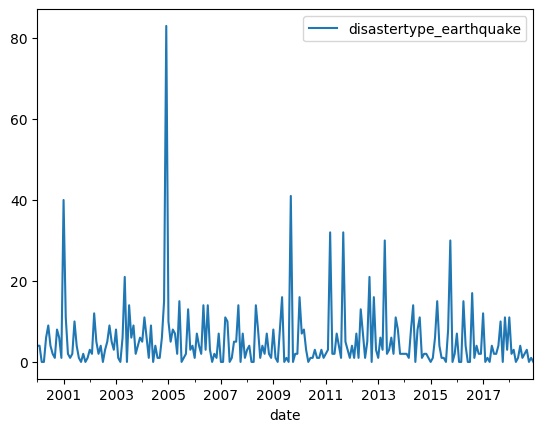

In [29]:
time_series_earthquake_df.plot()

<Axes: xlabel='date'>

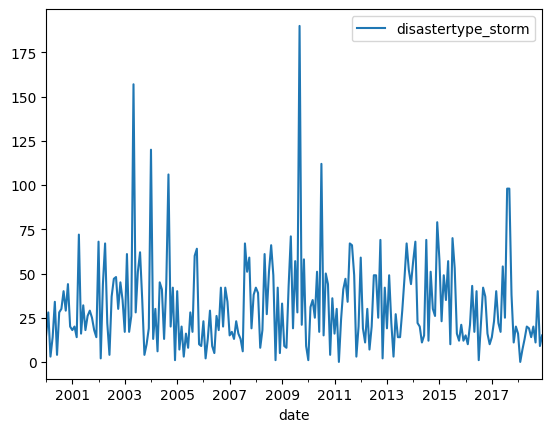

In [30]:
time_series_storm_df.plot()

<Axes: xlabel='date'>

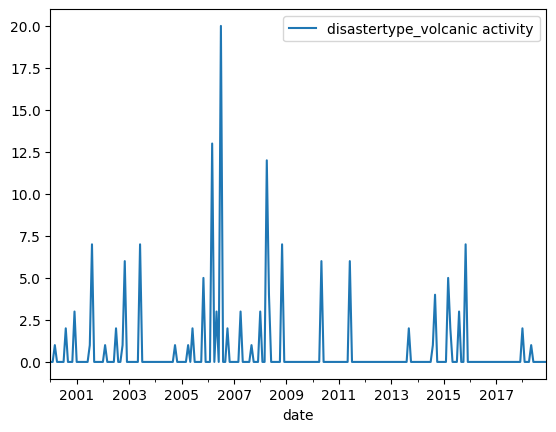

In [31]:
time_series_volcanic_activity_df.plot()

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")

In [34]:
print("Earthquake:")
adfuller_test(time_series_earthquake_df["disastertype_earthquake"])
print("\n")

print("Storm:")
adfuller_test(time_series_storm_df["disastertype_storm"])
print("\n")

print("Volcanic activity:")
adfuller_test(time_series_volcanic_activity_df["disastertype_volcanic activity"])
print("\n")

Earthquake:
ADF Test Statistic : -14.832434284757841
p-value : 1.890306518999873e-27
#Lags Used : 0
Number of Observations Used : 227
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


Storm:
ADF Test Statistic : -2.969148066099346
p-value : 0.03787776662180195
#Lags Used : 12
Number of Observations Used : 215
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


Volcanic activity:
ADF Test Statistic : -5.726287234923385
p-value : 6.759408879633269e-07
#Lags Used : 3
Number of Observations Used : 224
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary




In [35]:
import statsmodels.api as sm

In [36]:
def plot_correlation_functions(data):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(data, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

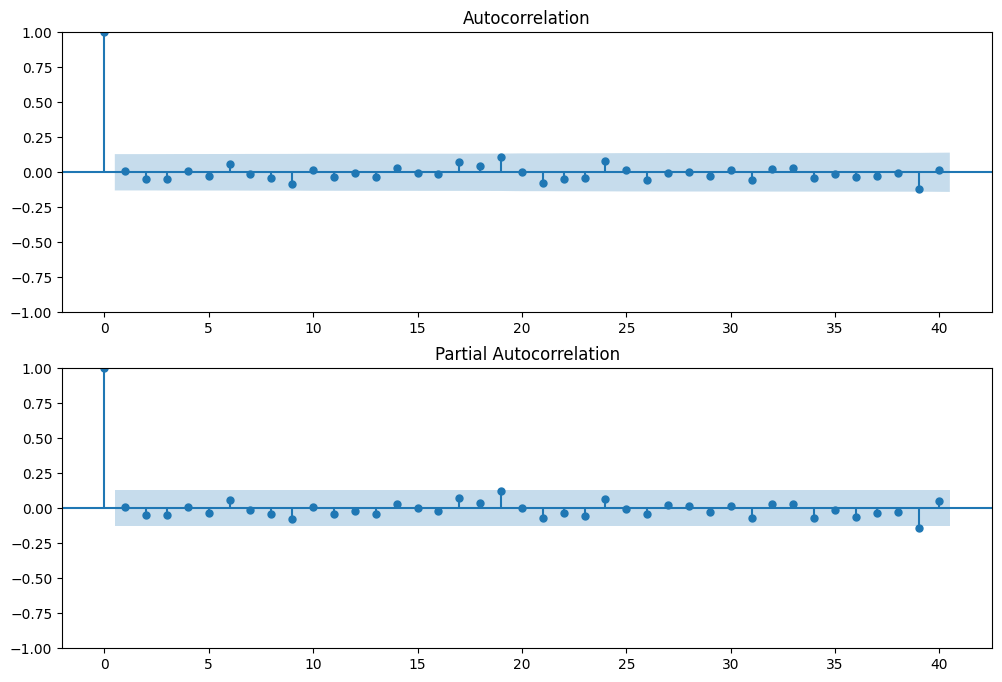

In [37]:
plot_correlation_functions(time_series_earthquake_df["disastertype_earthquake"])

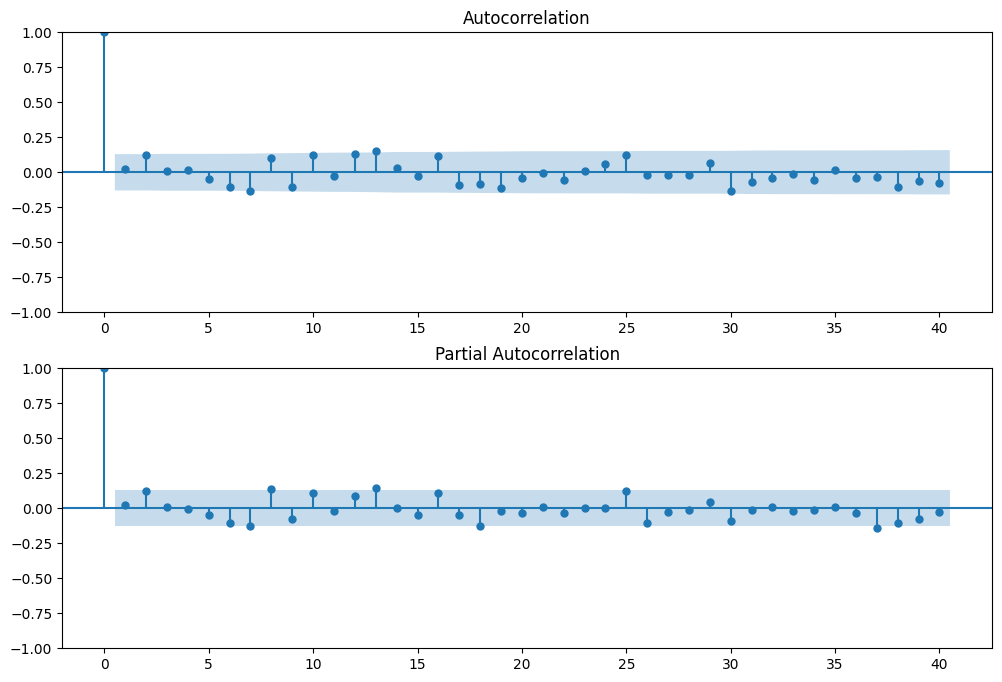

In [38]:
plot_correlation_functions(time_series_storm_df["disastertype_storm"])

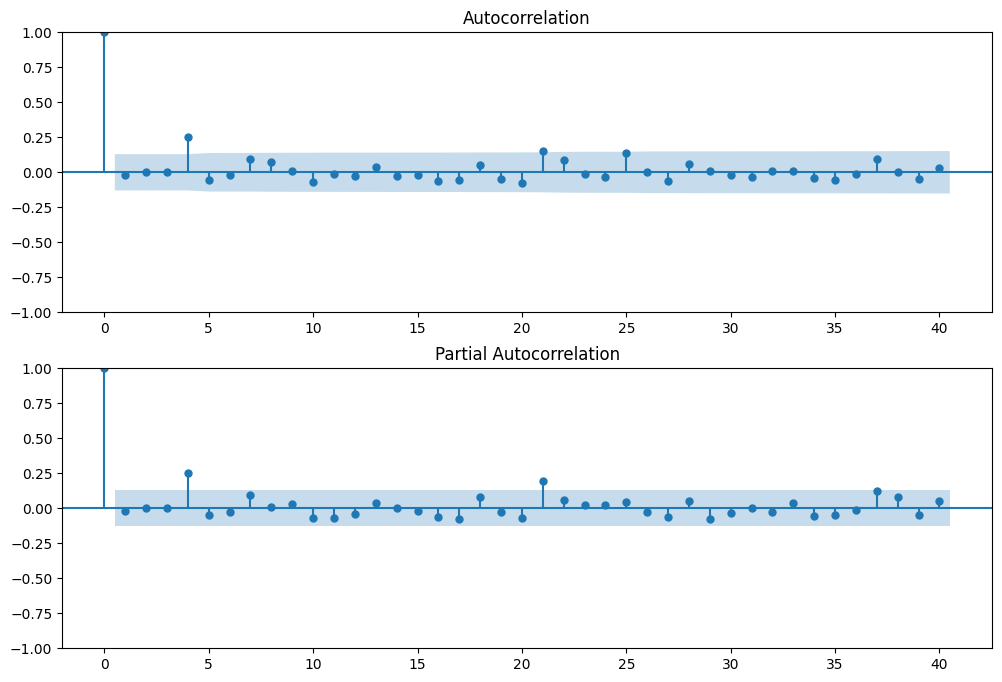

In [39]:
plot_correlation_functions(time_series_volcanic_activity_df["disastertype_volcanic activity"])

Regression dataset

In [40]:
df_copy.columns.values

array(['id', 'country', 'iso3', 'gwno', 'year', 'geo_id', 'geolocation',
       'level', 'adm1', 'adm2', 'adm3', 'location', 'historical',
       'hist_country', 'disastertype', 'disasterno', 'latitude',
       'longitude', 'DisNo.', 'Historic', 'Classification Key',
       'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale',
       'River Basin', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured',
       'No. Affected', 'No. Homeless', 'Total Affected',
       "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
       "Total Damage ('000 US$)", "

In [41]:
columns = ["latitude", "longitude", "disastertype", "Disaster Subtype", "Appeal", "Total Deaths"]
regression_df = df_copy[columns].copy(deep=True)
regression_df.head()

,latitude,longitude,disastertype,Disaster Subtype,Appeal,Total Deaths
15,22.039604,91.933855,storm,Tropical cyclone,No,7.0
16,21.615555,91.922088,storm,Tropical cyclone,No,7.0
17,21.436292,92.120963,storm,Tropical cyclone,No,7.0
18,22.120833,92.061916,storm,Tropical cyclone,No,7.0
19,22.772063,91.313514,storm,Storm (General),No,108.0


In [42]:
print("Any null values? ", regression_df.isnull().values.any())

Any null values?  True


In [43]:
regression_df.isna().sum()

latitude               0
longitude              0
disastertype           0
Disaster Subtype       0
Appeal                 0
Total Deaths        1253
dtype: int64

In [44]:
regression_df = regression_df.dropna()
regression_df.head()

,latitude,longitude,disastertype,Disaster Subtype,Appeal,Total Deaths
15,22.039604,91.933855,storm,Tropical cyclone,No,7.0
16,21.615555,91.922088,storm,Tropical cyclone,No,7.0
17,21.436292,92.120963,storm,Tropical cyclone,No,7.0
18,22.120833,92.061916,storm,Tropical cyclone,No,7.0
19,22.772063,91.313514,storm,Storm (General),No,108.0


In [45]:
regression_df = pd.get_dummies(regression_df, columns=["disastertype", "Disaster Subtype", "Appeal"])
regression_df.head()

,latitude,longitude,Total Deaths,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity,Disaster Subtype_Ash fall,Disaster Subtype_Blizzard/Winter storm,Disaster Subtype_Derecho,Disaster Subtype_Extra-tropical storm,...,Disaster Subtype_Sand/Dust storm,Disaster Subtype_Severe weather,Disaster Subtype_Storm (General),Disaster Subtype_Storm surge,Disaster Subtype_Tornado,Disaster Subtype_Tropical cyclone,Disaster Subtype_Tsunami,Disaster Subtype_Volcanic activity (General),Appeal_No,Appeal_Yes
15,22.039604,91.933855,7.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
16,21.615555,91.922088,7.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
17,21.436292,92.120963,7.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
18,22.120833,92.061916,7.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
19,22.772063,91.313514,108.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [46]:
regression_columns = list(regression_df.columns.values)
unwanted_columns = ["Total Deaths", "latitude", "longitude"]
dummy_columns = [column for column in regression_columns if column not in unwanted_columns]
print(dummy_columns)

['disastertype_earthquake', 'disastertype_storm', 'disastertype_volcanic activity', 'Disaster Subtype_Ash fall', 'Disaster Subtype_Blizzard/Winter storm', 'Disaster Subtype_Derecho', 'Disaster Subtype_Extra-tropical storm', 'Disaster Subtype_Ground movement', 'Disaster Subtype_Hail', 'Disaster Subtype_Lightning/Thunderstorms', 'Disaster Subtype_Sand/Dust storm', 'Disaster Subtype_Severe weather', 'Disaster Subtype_Storm (General)', 'Disaster Subtype_Storm surge', 'Disaster Subtype_Tornado', 'Disaster Subtype_Tropical cyclone', 'Disaster Subtype_Tsunami', 'Disaster Subtype_Volcanic activity (General)', 'Appeal_No', 'Appeal_Yes']


In [47]:
regression_df[dummy_columns] = regression_df[dummy_columns].astype(int)
regression_df.head()

,latitude,longitude,Total Deaths,disastertype_earthquake,disastertype_storm,disastertype_volcanic activity,Disaster Subtype_Ash fall,Disaster Subtype_Blizzard/Winter storm,Disaster Subtype_Derecho,Disaster Subtype_Extra-tropical storm,...,Disaster Subtype_Sand/Dust storm,Disaster Subtype_Severe weather,Disaster Subtype_Storm (General),Disaster Subtype_Storm surge,Disaster Subtype_Tornado,Disaster Subtype_Tropical cyclone,Disaster Subtype_Tsunami,Disaster Subtype_Volcanic activity (General),Appeal_No,Appeal_Yes
15,22.039604,91.933855,7.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
16,21.615555,91.922088,7.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
17,21.436292,92.120963,7.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
18,22.120833,92.061916,7.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
19,22.772063,91.313514,108.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.tsa.arima.model import ARIMA

In [49]:
class ARIMA_model(BaseEstimator, TransformerMixin):
    def __init__(self, X, order=(1, 0, 1), window_size=10, step_size=1, forecast_horizon=1, future_step_size=3):
        self.X = X
        self.order = order
        self.window_size = window_size
        self.step_size = step_size
        self.forecast_horizon = forecast_horizon
        self.future_step_size = future_step_size
        self.model_fit = None

    def fit(self, X=None, y=None):
        results = []

        for start in range(0, len(self.X) - self.window_size - self.forecast_horizon + 1, self.step_size):
            X_train = self.X.iloc[start : start + self.window_size]
            model = ARIMA(X_train, order=self.order)
            self.model_fit = model.fit()

            forecast = self.model_fit.forecast(steps=self.forecast_horizon)
            forecast_dates = self.X.index[start + self.window_size : start + self.window_size + self.forecast_horizon]

            results.append({
                "forecast_dates": forecast_dates,
                "forecast": forecast,
                "ground_truth": self.X.iloc[start + self.window_size : start + self.window_size + self.forecast_horizon]
            })

        self.plot_time_series(self.X.index[self.window_size], results)
        return self

    def transform(self, X=None):
        last_window = self.X.iloc[-self.window_size:].copy()

        forecasts = []
        forecast_dates = []

        last_index = self.X.index[-1]
        for step in range(0, self.future_step_size, self.forecast_horizon):
            model = ARIMA(last_window, order=self.order)
            self.model_fit = model.fit()
            forecast = self.model_fit.forecast(steps=self.forecast_horizon)
            forecast_dates.extend(pd.date_range(start=last_index, periods=self.forecast_horizon + 1, freq='D')[1:])
            forecasts.extend(forecast)
            last_index = forecast_dates[-1]

            last_window = pd.concat([last_window, forecast])[-self.window_size:]

        results = [{
            "forecast_dates": forecast_dates,
            "forecast": forecasts
        }]

        self.plot_time_series(self.X.index[-1], results)
        return np.array(results)
    
    def plot_time_series(self, x, results):
        plt.figure(figsize=(14, 7))
        plt.plot(self.X.index, self.X, label="Actual Data", color="black")

        for res in results:
            plt.plot(res["forecast_dates"], res["forecast"], color="red", linestyle="--", marker="o", alpha=0.3)
            if "ground_truth" in res:
                plt.plot(res["forecast_dates"], res["ground_truth"], color="blue", linestyle="--", marker="s", alpha=0.3)

        plt.xlabel("Date")
        plt.ylabel("Disaster Count")
        plt.title("ARIMA Sliding Window Forecasts")
        plt.axvline(x=x, color="gray", linestyle="dotted", label="Forecast Start")
        plt.legend(["Actual Data", "Forecasts", "Ground Truth"])
        plt.grid(True)
        plt.show()

c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\

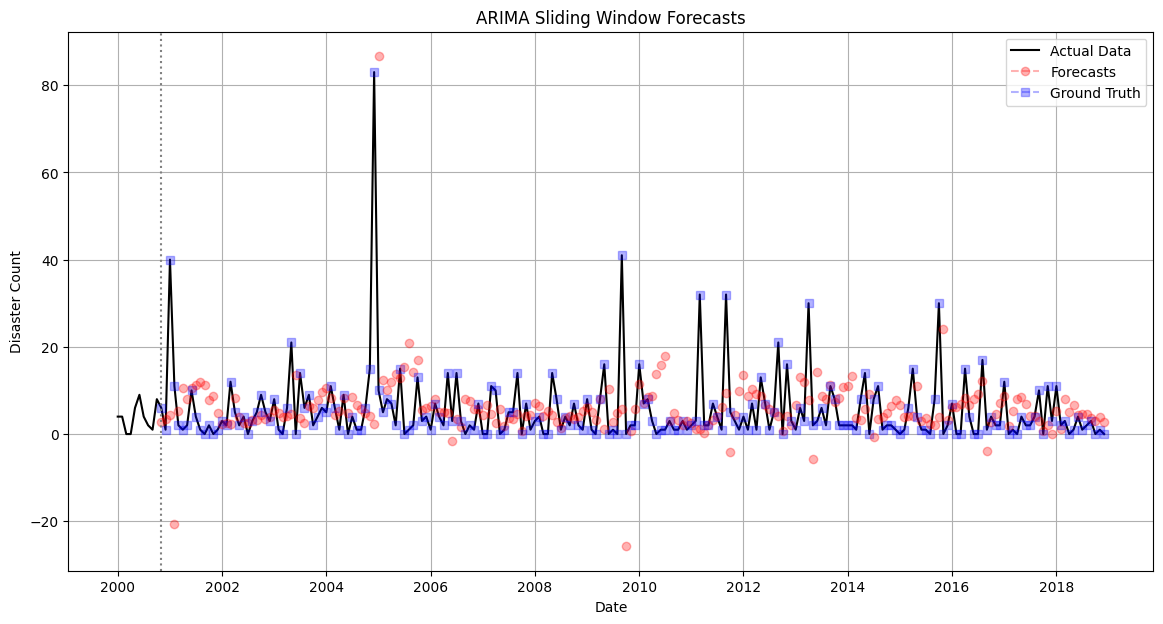

ARIMA_model(X=date
2000-01-01    4
2000-02-01    4
2000-03-01    0
2000-04-01    0
2000-05-01    6
             ..
2018-08-01    2
2018-09-01    3
2018-10-01    0
2018-11-01    1
2018-12-01    0
Name: disastertype_earthquake, Length: 228, dtype: int64)

In [50]:
earthquake_arima_model = ARIMA_model(time_series_earthquake_df["disastertype_earthquake"])
earthquake_arima_model.fit(None, None)

c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

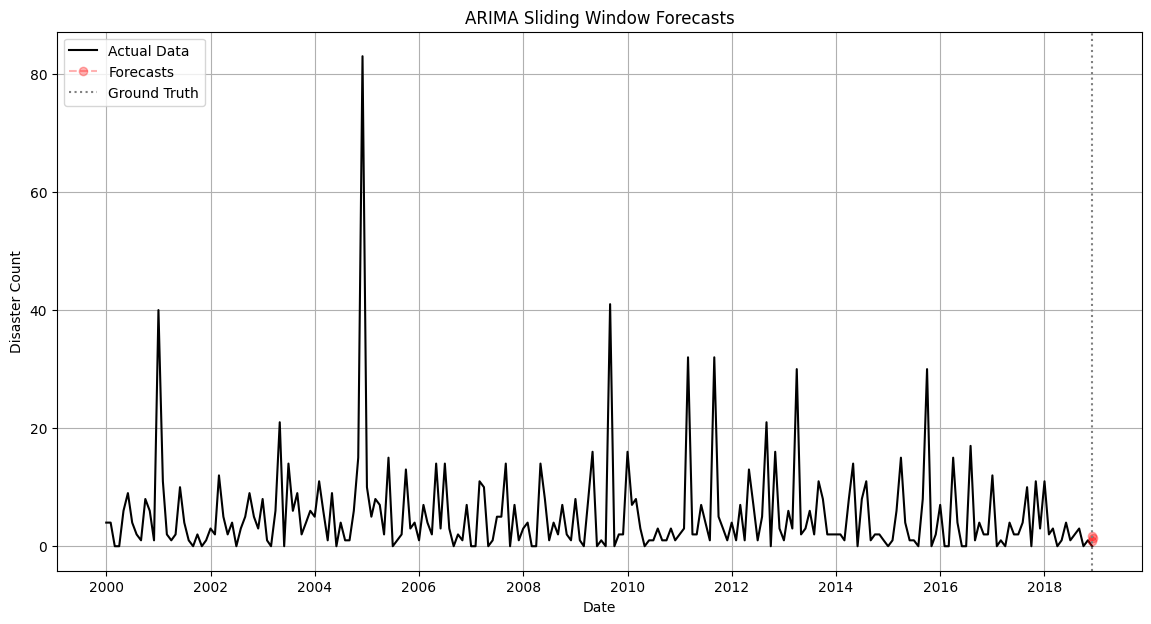

[{'forecast_dates': [Timestamp('2018-12-02 00:00:00'), Timestamp('2018-12-03 00:00:00'), Timestamp('2018-12-04 00:00:00')], 'forecast': [0.9183070071875064, 1.7236158323882134, 1.4293146777692152]}]


In [51]:
earthquake_forecast = earthquake_arima_model.transform(None)
print(earthquake_forecast)

c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

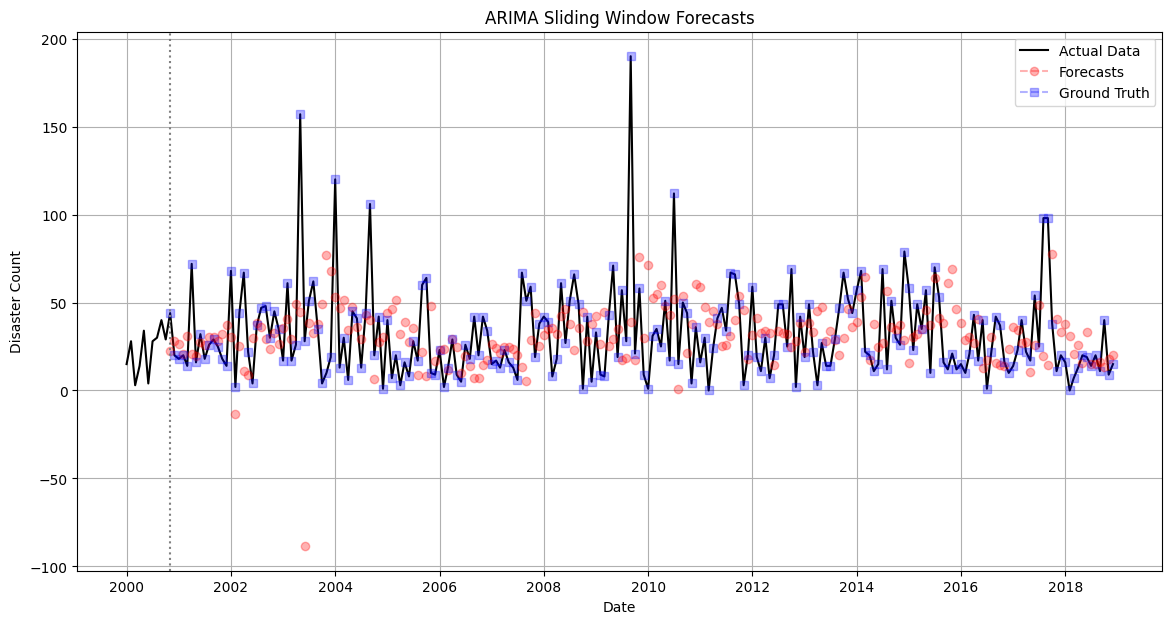

ARIMA_model(X=date
2000-01-01    15
2000-02-01    28
2000-03-01     3
2000-04-01    14
2000-05-01    34
              ..
2018-08-01    20
2018-09-01    11
2018-10-01    40
2018-11-01     9
2018-12-01    15
Name: disastertype_storm, Length: 228, dtype: int64)

In [52]:
storm_arima_model = ARIMA_model(time_series_storm_df["disastertype_storm"])
storm_arima_model.fit(None, None)

c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\

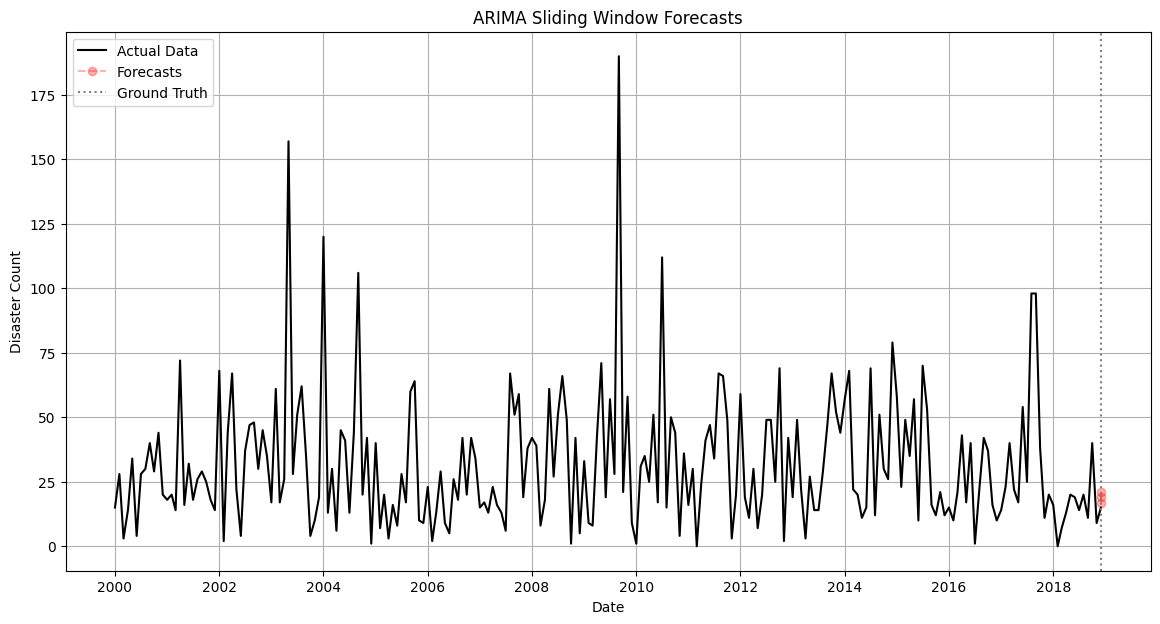

[{'forecast_dates': [Timestamp('2018-12-02 00:00:00'), Timestamp('2018-12-03 00:00:00'), Timestamp('2018-12-04 00:00:00')], 'forecast': [16.894460683725672, 21.010868315853227, 18.98011971225655]}]


In [53]:
storm_forecast = storm_arima_model.transform(None)
print(storm_forecast)

c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters foun

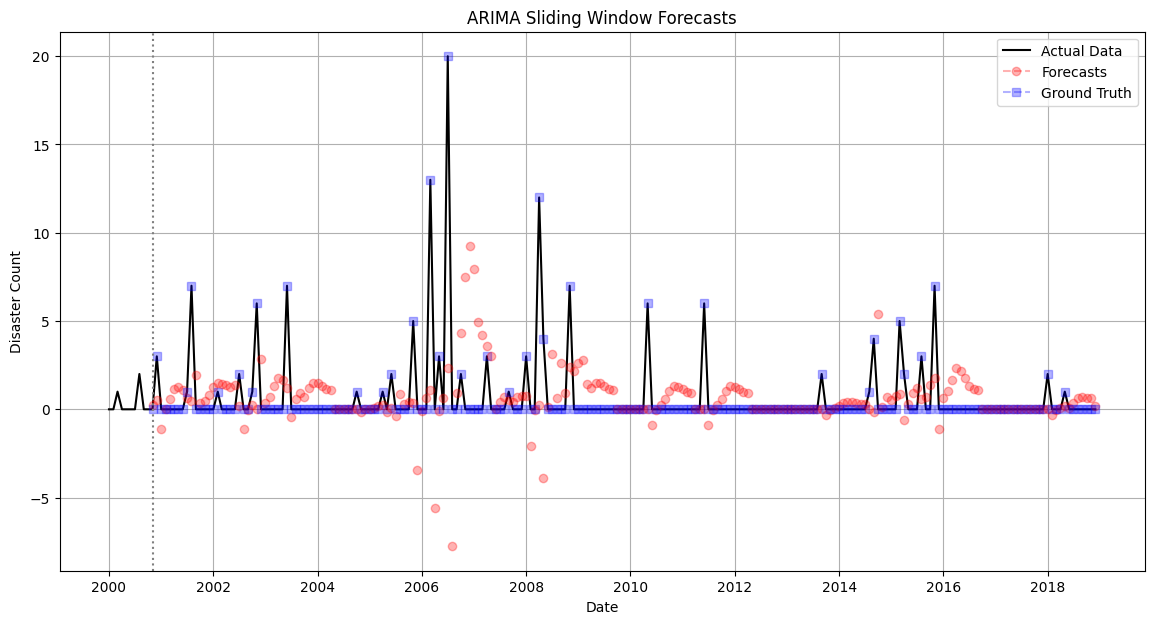

ARIMA_model(X=date
2000-01-01    0
2000-02-01    0
2000-03-01    1
2000-04-01    0
2000-05-01    0
             ..
2018-08-01    0
2018-09-01    0
2018-10-01    0
2018-11-01    0
2018-12-01    0
Name: disastertype_volcanic activity, Length: 228, dtype: int64)

In [54]:
volcanic_activity_arima_model = ARIMA_model(time_series_volcanic_activity_df["disastertype_volcanic activity"])
volcanic_activity_arima_model.fit(None, None)

c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\huber\Projects\

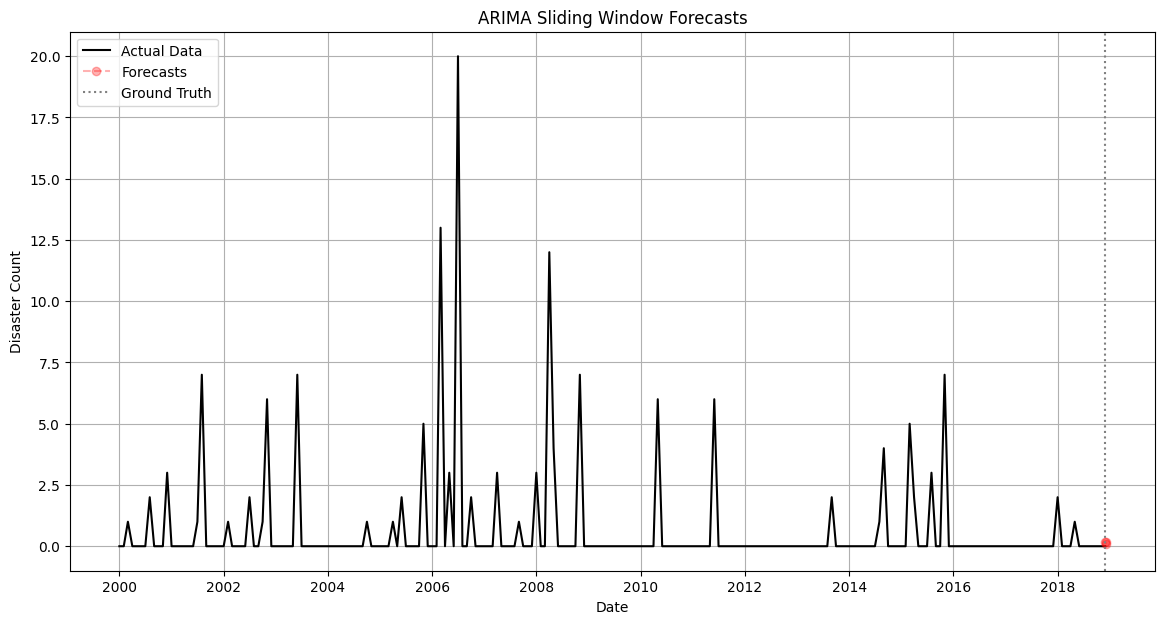

[{'forecast_dates': [Timestamp('2018-12-02 00:00:00'), Timestamp('2018-12-03 00:00:00'), Timestamp('2018-12-04 00:00:00')], 'forecast': [0.18711514685744324, 0.15324516870749805, 0.0910969161374201]}]


In [55]:
volcanic_activity_forecast = volcanic_activity_arima_model.transform(None)
print(volcanic_activity_forecast)

In [56]:
class GPR_model(BaseEstimator, TransformerMixin):
    def __init__(self, length_scale_bounds=(10, 500)):
        self.length_scale_bounds = length_scale_bounds
        self.kernel = RBF(length_scale_bounds=self.length_scale_bounds)
        self.gpr = GaussianProcessRegressor(kernel=self.kernel)

    def fit(self, X, y):
        self.gpr.fit(X, y)
        return self

    def transform(self, X):
        predicted_locations = self.gpr.predict(X)
        return predicted_locations

In [57]:
geospatial_columns = list(geospatial_df.columns.values)
target_features = ["latitude", "longitude"]
train_features = [column for column in geospatial_columns if column not in target_features]

X = geospatial_df.drop(target_features, axis=1).copy(deep=True)
y = geospatial_df[target_features].copy(deep=True)

geospatial_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])
X_pca = geospatial_pipeline.fit_transform(X)

print("Original number of features:", X.shape[1])
print("Reduced number of features after PCA:", X_pca.shape[1])

Original number of features: 23
Reduced number of features after PCA: 17


In [58]:
gpr_model = GPR_model()
gpr_model.fit(X_pca, y)

c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\huber\Projects\2D-Mapping-and-Simulation-Approach\env\lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GPR_model()

In [59]:
earthquake_forecast_list = earthquake_forecast[0]["forecast"]
storm_forecast_list = storm_forecast[0]["forecast"]
volcanic_activity_forecast_list = volcanic_activity_forecast[0]["forecast"]

geospatial_columns = list(geospatial_df.columns.values)
unwanted_columns = ["latitude", "longitude", "disastertype_earthquake", "disastertype_storm", "disastertype_volcanic activity"]
selected_columns = [column for column in geospatial_columns if column not in unwanted_columns]

# Get the unique combinations of disaster type, disaster subtype and region for inference
def generate_inference_data(disaster_type, original_df, selected_columns):
    inference_df = original_df[selected_columns].drop_duplicates().reset_index(drop=True)
    if disaster_type == 0:
        inference_df["disastertype_earthquake"] = 1
        inference_df["disastertype_storm"] = 0
        inference_df["disastertype_volcanic activity"] = 0
    elif disaster_type == 1:
        inference_df["disastertype_earthquake"] = 0
        inference_df["disastertype_storm"] = 1
        inference_df["disastertype_volcanic activity"] = 0
    else:
        inference_df["disastertype_earthquake"] = 0
        inference_df["disastertype_storm"] = 0
        inference_df["disastertype_volcanic activity"] = 1
    return inference_df

results = []
for index, (num_earthquakes, num_storms, num_volcanic) in enumerate(zip(earthquake_forecast_list, storm_forecast_list, volcanic_activity_forecast_list)):
    inference_df = pd.DataFrame(columns=["disastertype_earthquake", "disastertype_storm", "disastertype_volcanic activity"] + selected_columns)
    results_df = pd.DataFrame(columns=["disastertype_earthquake", "disastertype_storm", "disastertype_volcanic activity"] + selected_columns)
    
    # For each year, each disaster and region class, predict the location of the disaster
    if int(num_earthquakes) != 0:
        temp = generate_inference_data(disaster_type=0, original_df=geospatial_df, selected_columns=selected_columns)
        inference_df = pd.concat([inference_df, temp], ignore_index=True)
        results_df = pd.concat([results_df, temp], ignore_index=True)

    if int(num_storms) != 0:
        temp = generate_inference_data(disaster_type=1, original_df=geospatial_df, selected_columns=selected_columns)
        inference_df = pd.concat([inference_df, temp], ignore_index=True)
        results_df = pd.concat([results_df, temp], ignore_index=True)
        
    if int(num_volcanic) != 0:
        temp = generate_inference_data(disaster_type=2, original_df=geospatial_df, selected_columns=selected_columns)
        inference_df = pd.concat([inference_df, temp], ignore_index=True)
        results_df = pd.concat([results_df, temp], ignore_index=True)
        
    X_inference = geospatial_pipeline.transform(inference_df)
    predictions = gpr_model.transform(X_inference)
    predictions = np.array(predictions)

    results_df["latitude"] = predictions[:, 0]
    results_df["longitude"] = predictions[:, 1]
    results.append(results_df)

In [60]:
class GRB_model(BaseEstimator, TransformerMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.grb = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    def fit(self, X, y):
        self.grb.fit(X, y)
        return self
    
    def transform(self, X):
        predictions = self.grb.predict(X)
        return predictions

In [61]:
regression_columns = list(regression_df.columns.values)
target_features = ["Total Deaths"]
train_features = [column for column in regression_columns if column not in target_features]

X = regression_df.drop(target_features, axis=1).copy(deep=True)
y = regression_df[target_features].copy(deep=True)
y = np.array(y).ravel()

regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])
X_pca = regression_pipeline.fit_transform(X)

print("Original number of features:", X.shape[1])
print("Reduced number of features after PCA:", X_pca.shape[1])

Original number of features: 22
Reduced number of features after PCA: 16


In [62]:
grb_model = GRB_model()
grb_model.fit(X_pca, y)

GRB_model()

In [63]:
# Perform predictions on each year
final_results = {}
for index, past_result in enumerate(results):
    inference_df = past_result[past_result.columns.drop(list(past_result.filter(regex="Region")))].copy(deep=True)
    inference_df_two = inference_df.copy(deep=True)

    inference_df["Appeal_No"] = [0] * inference_df.shape[0]
    inference_df["Appeal_Yes"] = [1] * inference_df.shape[0]

    inference_df_two["Appeal_No"] = [1] * inference_df.shape[0]
    inference_df_two["Appeal_Yes"] = [0] * inference_df.shape[0]

    final_inference_df = pd.concat([inference_df, inference_df_two], ignore_index=True)

    # Reorder the order of the columns to match our pipeline
    final_inference_df = final_inference_df[train_features]
    
    X_inference = regression_pipeline.transform(final_inference_df)
    predictions = grb_model.transform(X_inference)

    # Can append the prediction results back to the original inference dataframe
    final_result_dataframe = final_inference_df.copy(deep=True)
    final_result_dataframe["Total Deaths"] = predictions
    final_results[f"{index}"] = final_result_dataframe

In [64]:
for index, final_result_dataframe in final_results.items():
    disaster_types_columns = ['disastertype_earthquake', 'disastertype_storm', 'disastertype_volcanic activity']
    final_result_dataframe['Disaster type'] = final_result_dataframe[disaster_types_columns].idxmax(axis=1)
    final_result_dataframe['Disaster type'] = final_result_dataframe['Disaster type'].replace({
        'disastertype_earthquake': 'earthquake',
        'disastertype_storm': 'storm',
        'disastertype_volcanic activity': 'volcanic activity'
    })

    disaster_subtypes_columns = [
        'Disaster Subtype_Ash fall',
        'Disaster Subtype_Blizzard/Winter storm',
        'Disaster Subtype_Derecho',
        'Disaster Subtype_Extra-tropical storm',
        'Disaster Subtype_Ground movement',
        'Disaster Subtype_Hail',
        'Disaster Subtype_Lightning/Thunderstorms',
        'Disaster Subtype_Sand/Dust storm',
        'Disaster Subtype_Severe weather',
        'Disaster Subtype_Storm (General)',
        'Disaster Subtype_Storm surge',
        'Disaster Subtype_Tornado',
        'Disaster Subtype_Tropical cyclone',
        'Disaster Subtype_Tsunami',
        'Disaster Subtype_Volcanic activity (General)'
    ]
    final_result_dataframe['Disaster subtype'] = final_result_dataframe[disaster_subtypes_columns].idxmax(axis=1)
    final_result_dataframe['Disaster subtype'] = final_result_dataframe['Disaster subtype'].replace({
        'Disaster Subtype_Ash fall': 'Ash Fall',
        'Disaster Subtype_Blizzard/Winter storm': 'Blizzard/Winter storm',
        'Disaster Subtype_Derecho': 'Derecho',
        'Disaster Subtype_Extra-tropical storm': 'Extra-tropical storm',
        'Disaster Subtype_Ground movement': 'Ground movement',
        'Disaster Subtype_Hail': 'Hail',
        'Disaster Subtype_Lightning/Thunderstorms': 'Lightning/Thunderstorms',
        'Disaster Subtype_Sand/Dust storm': 'Sand/Dust storm',
        'Disaster Subtype_Severe weather': 'Severe weather',
        'Disaster Subtype_Storm (General)': 'Storm (General)',
        'Disaster Subtype_Storm surge': 'Storm surge',
        'Disaster Subtype_Tornado': 'Tornado',
        'Disaster Subtype_Tropical cyclone': 'Tropical cyclone',
        'Disaster Subtype_Tsunami': 'Tsunami',
        'Disaster Subtype_Volcanic activity (General)': 'Volcanic activity (General)'
    })

    appeal_columns = ['Appeal_No', 'Appeal_Yes']
    final_result_dataframe['Appeal'] = final_result_dataframe[appeal_columns].idxmax(axis=1)
    final_result_dataframe['Appeal'] = final_result_dataframe['Appeal'].replace({
        'Appeal_No': 'No',
        'Appeal_Yes': 'Yes'
    })

    final_result_dataframe["Total Deaths"] = final_result_dataframe["Total Deaths"].clip(lower=0)

    # Drop the columns and assign it back to the dataframe
    final_results[index] = final_result_dataframe.drop(
        columns=disaster_types_columns + disaster_subtypes_columns + appeal_columns,
        axis=1
    )

In [65]:
# Can perhaps include the extracted data as well
temp = df_copy[["year", "latitude", "longitude", "Total Deaths", "disastertype", "Disaster Subtype", "Appeal"]]
temp.head()

,year,latitude,longitude,Total Deaths,disastertype,Disaster Subtype,Appeal
15,2009,22.039604,91.933855,7.0,storm,Tropical cyclone,No
16,2009,21.615555,91.922088,7.0,storm,Tropical cyclone,No
17,2009,21.436292,92.120963,7.0,storm,Tropical cyclone,No
18,2009,22.120833,92.061916,7.0,storm,Tropical cyclone,No
19,2012,22.772063,91.313514,108.0,storm,Storm (General),No


In [66]:
temp = temp.rename(columns={'disastertype': 'Disaster type', 'Disaster Subtype': 'Disaster subtype'})
temp["Total Deaths"] = temp["Total Deaths"].fillna(0)
temp.head()

,year,latitude,longitude,Total Deaths,Disaster type,Disaster subtype,Appeal
15,2009,22.039604,91.933855,7.0,storm,Tropical cyclone,No
16,2009,21.615555,91.922088,7.0,storm,Tropical cyclone,No
17,2009,21.436292,92.120963,7.0,storm,Tropical cyclone,No
18,2009,22.120833,92.061916,7.0,storm,Tropical cyclone,No
19,2012,22.772063,91.313514,108.0,storm,Storm (General),No


In [67]:
a = temp['year'].unique()
a = sorted(a)
print(a)
final_year = int(a[-1])
print("Final year: ", final_year)

[np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]
Final year:  2018


In [68]:
final_final_results = {year: group for year, group in temp.groupby('year')}

# Add in the predicted data as well
for index, final_result_dataframe in final_results.items():
    final_year += 1
    final_final_results[f"{final_year}"] = final_result_dataframe

In [69]:
# What needs to be send to the 2D map:
# - Total number of deaths that would occur for every disaster
# - Longitude and latitude values of every disaster
# - The number of earthquakes, storms and volcanic activities?
# {
#     "Total number of deaths": value,
#     "Latitude": value,
#     "Longitude": value,
#     "Disaster type": value,
#     "Disaster subtype": value
# }
import json
final_final_results_serializable = {key: df.to_dict(orient="records") for key, df in final_final_results.items()}
with open("data/disasters.json", "w") as f:
    json.dump(final_final_results_serializable, f, indent=4)